<a href="https://colab.research.google.com/github/Anannyyya/python_examples/blob/master/CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

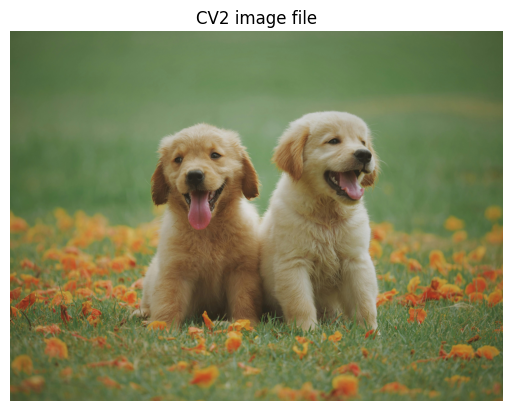

In [1]:
import matplotlib.pyplot as plt
import cv2

image=cv2.imread("/content/pexels-photo-1108099.jpeg")
img_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#display the image using matplotlib library
plt.imshow(img_rgb)
plt.axis("off")
plt.title("CV2 image file")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


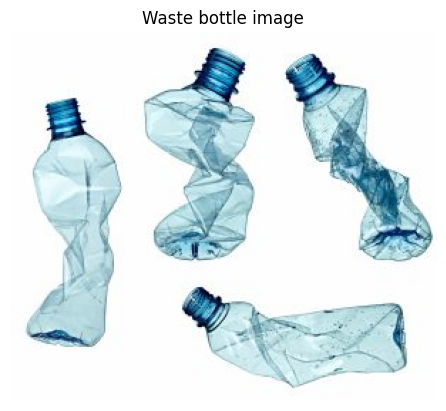

1: nipple (0.39)
2: water_bottle (0.16)
3: oxygen_mask (0.12)


In [3]:
# Importing required libraries
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights="imagenet")

# Load the image of waste bottle
img_path = "/content/shutterstock_71928208-min-300x260.jpg"

# Read the image using OpenCV
image = cv2.imread(img_path)

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to match MobileNetV2 input size
image_resized = cv2.resize(image, (224, 224))

# Normalize the image (scale pixel values to [0,1])
image_resized = image_resized / 255.0

# Expand dimensions to fit model input shape
image_resized = np.expand_dims(image_resized, axis=0)

# Predict on the image
prediction = model.predict(image_resized)

# Decode the predictions
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(prediction, top=3)[0]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Waste bottle image")
plt.show()

# Print top-3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

--2025-02-28 10:04:07--  https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118803 (116K) [text/plain]
Saving to: ‘haarcascade_car.xml’

haarcascade_car.xml 100%[===================>] 116.02K  --.-KB/s    in 0.02s   

2025-02-28 10:04:07 (4.66 MB/s) - ‘haarcascade_car.xml’ saved [118803/118803]



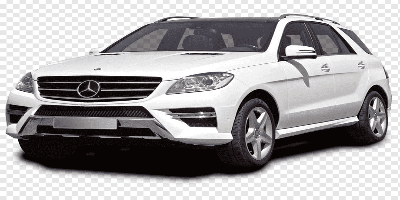

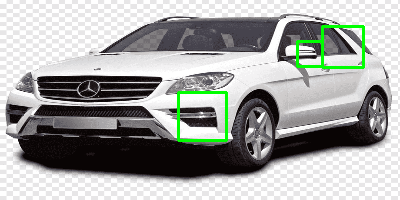

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load a pre-trained car detection model
!wget https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml -O haarcascade_car.xml
car_cascade = cv2.CascadeClassifier('haarcascade_car.xml')

# Load the image of the parking lot
image = cv2.imread('/content/png-transparent-car-mercedes-car-love-compact-car-vehicle.png')  # Update the path if needed

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Resize the image using OpenCV's resize function
    image = cv2.resize(image, (400, 200))

    # Show the original image
    cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow

    # Convert the image to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect cars in the image
    cars = car_cascade.detectMultiScale(gray_image, 1.1, 1)

    # Draw rectangles around the detected cars
    for (x, y, w, h) in cars:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image with detected cars
    cv2_imshow(image)  # Use cv2_imshow here too
    cv2.waitKey(0)
    cv2.destroyAllWindows()
